Imports and Setup

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# For better display in notebooks
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

Data Loading

In [2]:
# Try reading the dataset with different encodings
encodings = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']

for encoding in encodings:
    try:
        print(f"Trying encoding: {encoding}")
        df = pd.read_csv('../data/external/mendeley_sri_lanka_reviews.csv', encoding=encoding)
        print(f"Successfully read the file with {encoding} encoding")
        break
    except UnicodeDecodeError:
        print(f"Failed with {encoding} encoding")
        continue

Trying encoding: utf-8
Failed with utf-8 encoding
Trying encoding: latin1
Successfully read the file with latin1 encoding


Basic Dataset Information

In [3]:
# Display basic information about the dataset
print("Dataset Info:")
print("-" * 50)
print(df.info())
print(f"Shape: {df.shape}")
print("\nFirst few rows:")
print("-" * 50)
display(df.head())

print("\nBasic statistics:")
print("-" * 50)
display(df.describe())

print("\nColumns in the dataset:")
print("-" * 50)
print(df.columns.tolist())

Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16156 entries, 0 to 16155
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Location_Name       16156 non-null  object
 1   Located_City        16156 non-null  object
 2   Location            16156 non-null  object
 3   Location_Type       16156 non-null  object
 4   User_ID             16156 non-null  object
 5   User_Location       16156 non-null  object
 6   User_Locale         16156 non-null  object
 7   User_Contributions  16156 non-null  int64 
 8   Travel_Date         16156 non-null  object
 9   Published_Date      16156 non-null  object
 10  Rating              16156 non-null  int64 
 11  Helpful_Votes       16156 non-null  int64 
 12  Title               16156 non-null  object
 13  Text                16156 non-null  object
dtypes: int64(3), object(11)
memory usage: 1.7+ MB
None
Sh

,Location_Name,Located_City,Location,Location_Type,User_ID,User_Location,User_Locale,User_Contributions,Travel_Date,Published_Date,Rating,Helpful_Votes,Title,Text
0,Arugam Bay,Arugam Bay,"Arugam Bay, Eastern Province",Beaches,User 1,"Dunsborough, Australia",en_US,8,2019-07,2019-07-31T07:53:21-04:00,5,1,Best nail spa in Arugam bay on the water!,I had a manicure here and it really was professional and clean. It is right on the Ocean so ver...
1,Arugam Bay,Arugam Bay,"Arugam Bay, Eastern Province",Beaches,User 2,"Bendigo, Australia",en_US,4,2019-06,2019-07-21T21:50:11-04:00,4,0,Best for surfing,"Overall, it is a wonderful experience. We visited Arugam bay last month during our anniversary. ..."
2,Arugam Bay,Arugam Bay,"Arugam Bay, Eastern Province",Beaches,User 3,"Melbourne, Australia",en_US,13,2019-07,2019-07-15T18:52:55-04:00,5,0,We Love Arugam Bay,"Great place to chill, swim, surf, eat, shop, have sunset cocktails, itÂs the best!!! The vibe i..."
3,Arugam Bay,Arugam Bay,"Arugam Bay, Eastern Province",Beaches,User 4,"Ericeira, Portugal",en_US,4,2019-06,2019-07-03T10:32:41-04:00,5,0,Sun and waves.,Good place for surf and a few stores to going for shopping. Very good place for rest and surf. G...
4,Arugam Bay,Arugam Bay,"Arugam Bay, Eastern Province",Beaches,User 5,"Pistoia, Italy",en_US,14,2019-07,2019-07-02T17:07:02-04:00,5,0,"Great swimming, surfing, great fish aznd friendly people",This place is great for surfing but even if you are not a surfer you can have a wonderful time s...



Basic statistics:
--------------------------------------------------


,User_Contributions,Rating,Helpful_Votes
count,16156.000000,16156.000000,16156.000000
mean,191.624845,4.167492,0.709458
std,500.100421,1.006840,3.672513
min,1.000000,1.000000,0.000000
25%,18.000000,4.000000,0.000000
50%,54.000000,4.000000,0.000000
75%,155.000000,5.000000,1.000000
max,9010.000000,5.000000,233.000000



Columns in the dataset:
--------------------------------------------------
['Location_Name', 'Located_City', 'Location', 'Location_Type', 'User_ID', 'User_Location', 'User_Locale', 'User_Contributions', 'Travel_Date', 'Published_Date', 'Rating', 'Helpful_Votes', 'Title', 'Text']


Review Content Analysis

In [4]:
# Analyze review text characteristics
df['text_length'] = df['Text'].str.len()
df['text_word_count'] = df['Text'].str.split().str.len()
df['title_length'] = df['Title'].str.len()
df['title_word_count'] = df['Title'].str.split().str.len()

print("Review Content Statistics:")
print("-" * 50)
print(f"Average text length: {df['text_length'].mean():.0f} characters")
print(f"Average text word count: {df['text_word_count'].mean():.0f} words")
print(f"Average title length: {df['title_length'].mean():.0f} characters")
print(f"Average title word count: {df['title_word_count'].mean():.0f} words")
print(f"\nText length range: {df['text_length'].min()} - {df['text_length'].max()} characters")
print(f"Word count range: {df['text_word_count'].min()} - {df['text_word_count'].max()} words")

Review Content Statistics:
--------------------------------------------------
Average text length: 381 characters
Average text word count: 70 words
Average title length: 25 characters
Average title word count: 4 words

Text length range: 50 - 9430 characters
Word count range: 1 - 1700 words


Text Length Visualizations

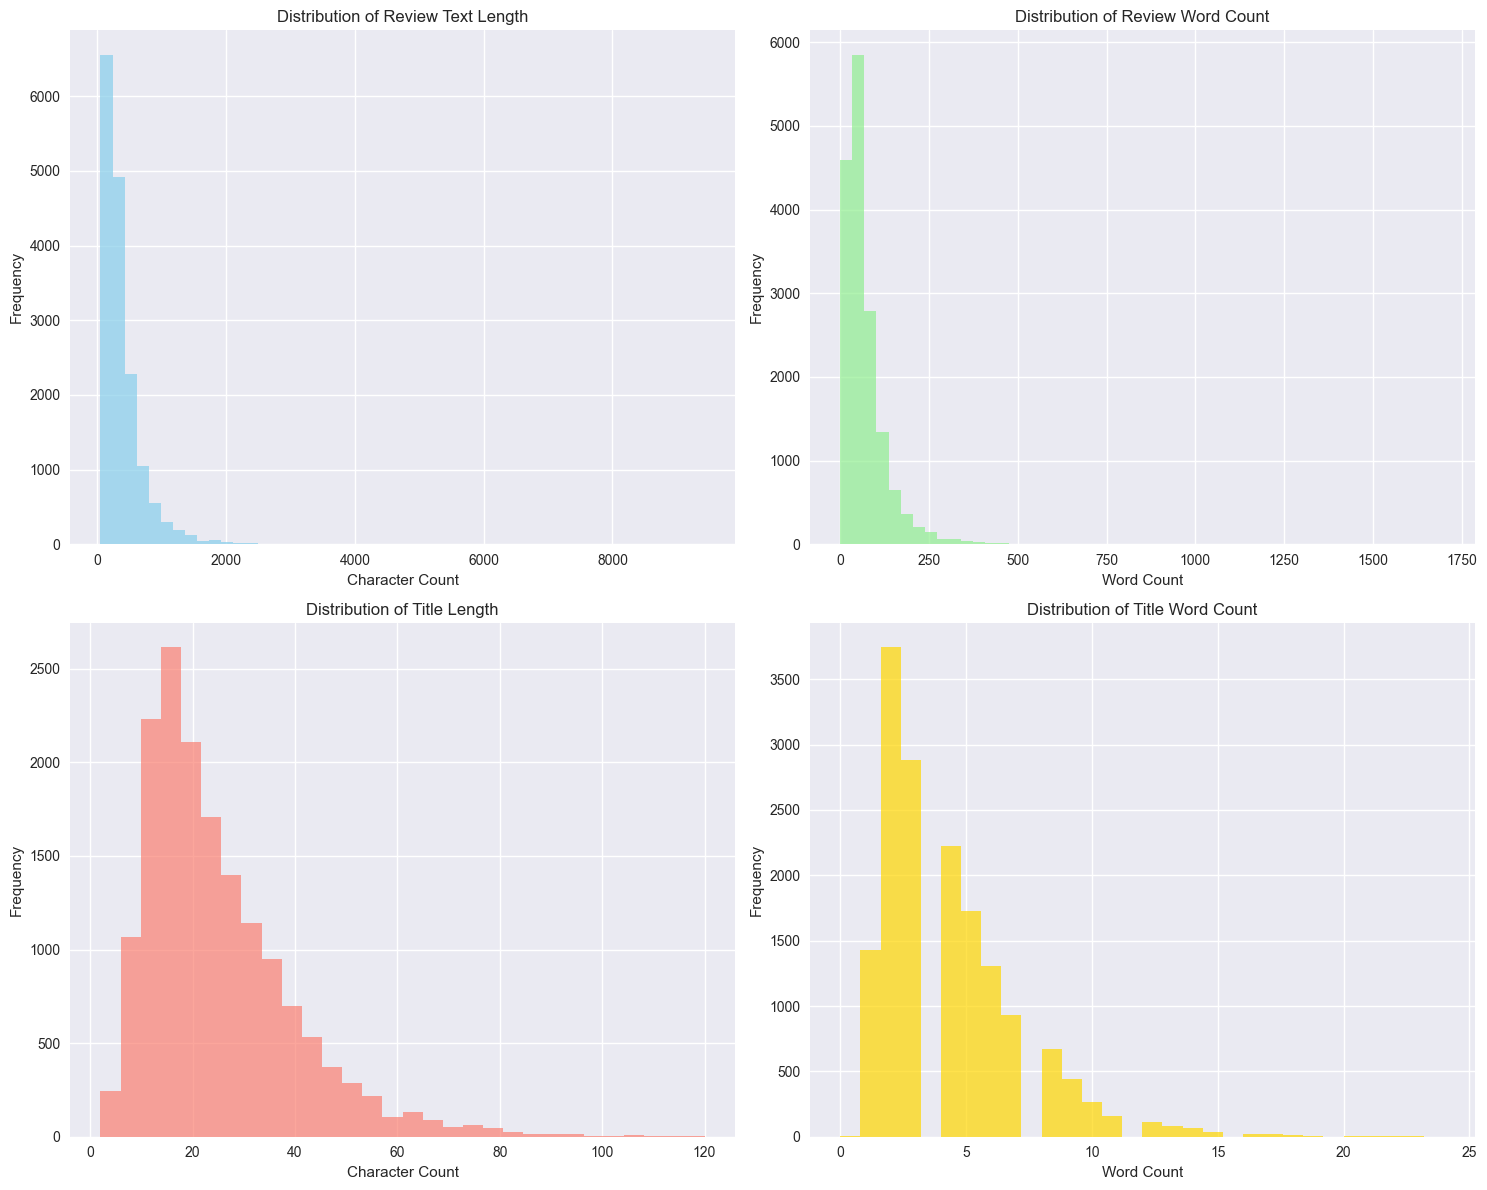

In [5]:
# Visualize text length distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Text length distribution
axes[0,0].hist(df['text_length'], bins=50, alpha=0.7, color='skyblue')
axes[0,0].set_title('Distribution of Review Text Length')
axes[0,0].set_xlabel('Character Count')
axes[0,0].set_ylabel('Frequency')

# Word count distribution
axes[0,1].hist(df['text_word_count'], bins=50, alpha=0.7, color='lightgreen')
axes[0,1].set_title('Distribution of Review Word Count')
axes[0,1].set_xlabel('Word Count')
axes[0,1].set_ylabel('Frequency')

# Title length distribution
axes[1,0].hist(df['title_length'], bins=30, alpha=0.7, color='salmon')
axes[1,0].set_title('Distribution of Title Length')
axes[1,0].set_xlabel('Character Count')
axes[1,0].set_ylabel('Frequency')

# Title word count distribution
axes[1,1].hist(df['title_word_count'], bins=30, alpha=0.7, color='gold')
axes[1,1].set_title('Distribution of Title Word Count')
axes[1,1].set_xlabel('Word Count')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Rating Analysis

In [6]:
# Analyze rating distribution
print("Rating Distribution:")
print("-" * 50)
rating_counts = df['Rating'].value_counts().sort_index()
rating_percentages = (rating_counts / len(df)) * 100

for rating, count in rating_counts.items():
    percentage = rating_percentages[rating]
    print(f"{rating} stars: {count:,} reviews ({percentage:.1f}%)")

print(f"\nAverage rating: {df['Rating'].mean():.2f}")
print(f"Median rating: {df['Rating'].median():.0f}")

Rating Distribution:
--------------------------------------------------
1 stars: 487 reviews (3.0%)
2 stars: 658 reviews (4.1%)
3 stars: 2,166 reviews (13.4%)
4 stars: 5,196 reviews (32.2%)
5 stars: 7,649 reviews (47.3%)

Average rating: 4.17
Median rating: 4


Rating Visualizations

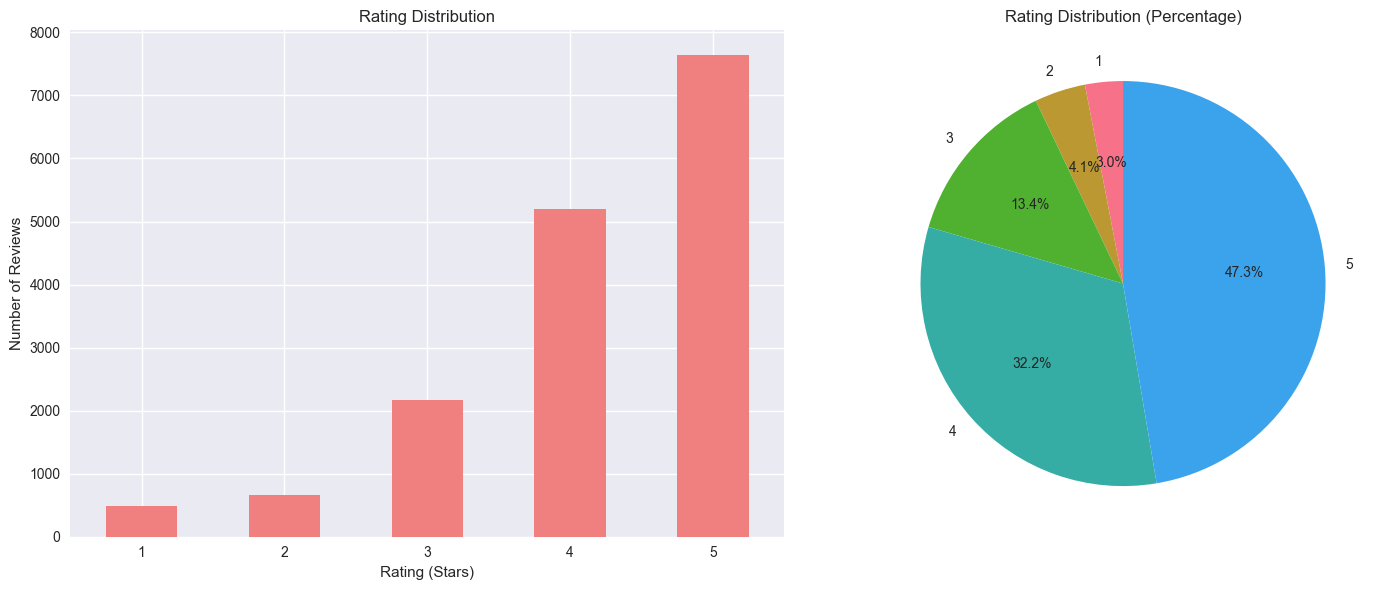

In [7]:
# Visualize rating distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot
rating_counts.plot(kind='bar', ax=ax1, color='lightcoral')
ax1.set_title('Rating Distribution')
ax1.set_xlabel('Rating (Stars)')
ax1.set_ylabel('Number of Reviews')
ax1.tick_params(axis='x', rotation=0)

# Pie chart
ax2.pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Rating Distribution (Percentage)')

plt.tight_layout()
plt.show()

Location Type Analysis

In [8]:
# Analyze location types
print("Location Types:")
print("-" * 50)
location_type_counts = df['Location_Type'].value_counts()
for loc_type, count in location_type_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{loc_type}: {count:,} reviews ({percentage:.1f}%)")

print(f"\nUnique location types: {df['Location_Type'].nunique()}")

Location Types:
--------------------------------------------------
Religious Sites: 3,017 reviews (18.7%)
Beaches: 2,110 reviews (13.1%)
Farms: 1,884 reviews (11.7%)
Nature & Wildlife Areas: 1,557 reviews (9.6%)
Museums: 1,525 reviews (9.4%)
Historic Sites: 1,519 reviews (9.4%)
Gardens: 1,354 reviews (8.4%)
National Parks: 1,205 reviews (7.5%)
Waterfalls: 933 reviews (5.8%)
Bodies of Water: 839 reviews (5.2%)
Zoological Gardens: 213 reviews (1.3%)

Unique location types: 11


Location Visualization

City Analysis

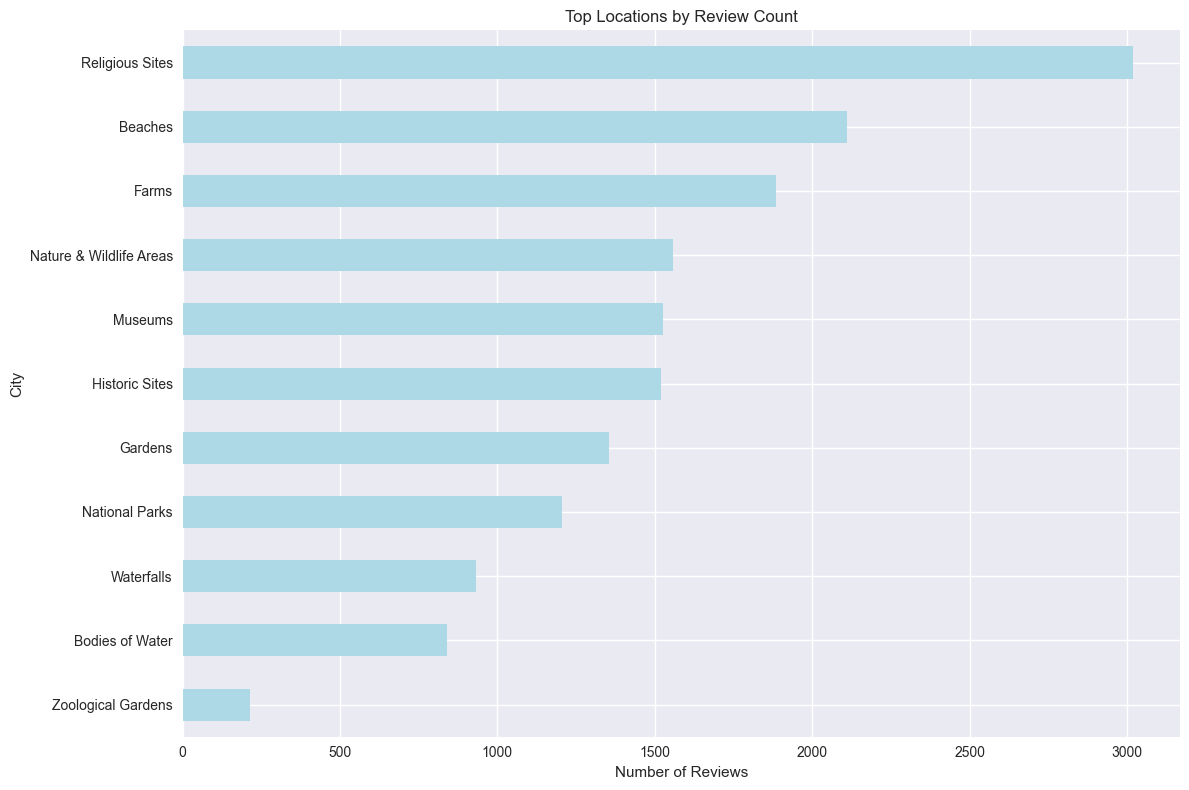

In [9]:
# Visualize top cities
plt.figure(figsize=(12, 8))
location_type_counts.plot(kind='barh', color='lightblue')
plt.title('Top Locations by Review Count')
plt.xlabel('Number of Reviews')
plt.ylabel('City')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [10]:
# Analyze cities
print("Top 15 Cities by Review Count:")
print("-" * 50)
city_counts = df['Located_City'].value_counts().head(15)
for city, count in city_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{city}: {count:,} reviews ({percentage:.1f}%)")

print(f"\nTotal unique cities: {df['Located_City'].nunique()}")

Top 15 Cities by Review Count:
--------------------------------------------------
Nuwara Eliya: 2,221 reviews (13.7%)
Anuradhapura: 1,758 reviews (10.9%)
Kandy: 1,480 reviews (9.2%)
Colombo: 1,171 reviews (7.2%)
Sigiriya: 763 reviews (4.7%)
Habarana: 754 reviews (4.7%)
Hikkaduwa: 515 reviews (3.2%)
Galle: 511 reviews (3.2%)
Jaffna: 475 reviews (2.9%)
Ella: 471 reviews (2.9%)
Haputale: 409 reviews (2.5%)
Trincomalee: 409 reviews (2.5%)
Nilaveli: 371 reviews (2.3%)
Pinnawala: 369 reviews (2.3%)
Peradeniya: 337 reviews (2.1%)

Total unique cities: 36


City Visualization

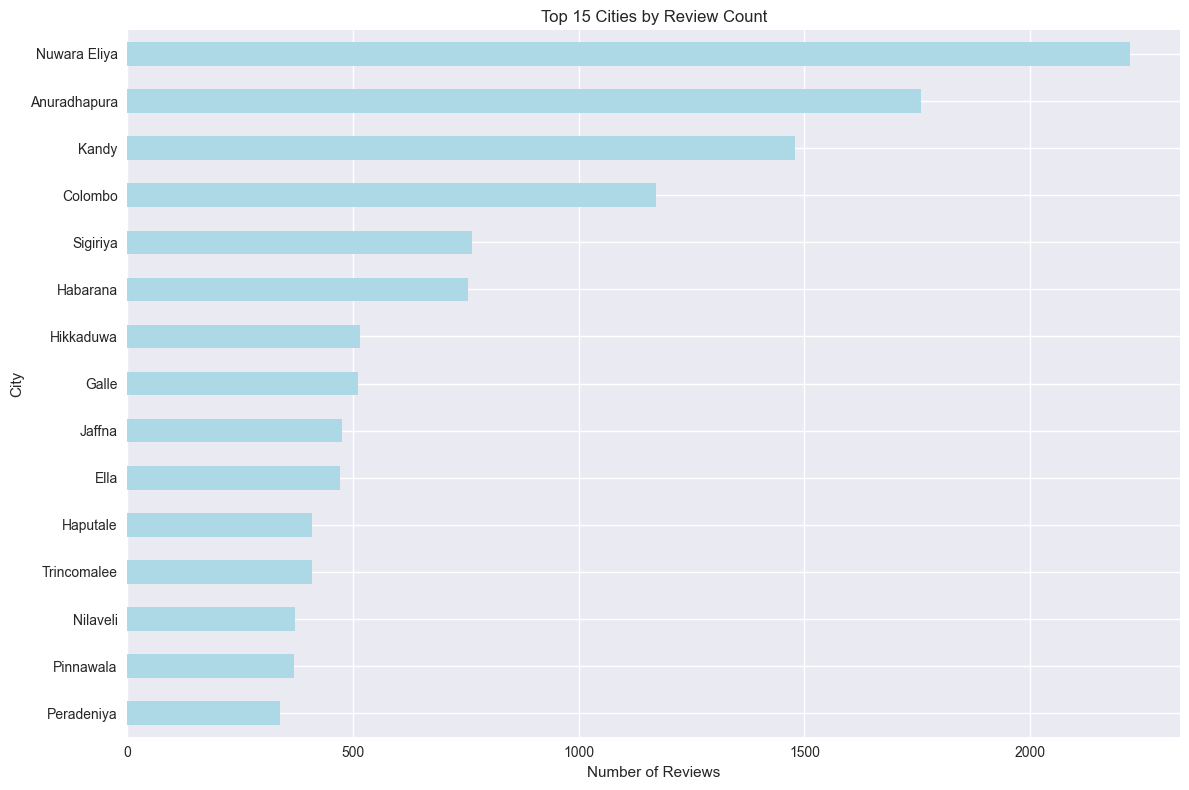

In [11]:
# Visualize top cities
plt.figure(figsize=(12, 8))
city_counts.plot(kind='barh', color='lightblue')
plt.title('Top 15 Cities by Review Count')
plt.xlabel('Number of Reviews')
plt.ylabel('City')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

User Location Analysis

In [12]:
# Analyze user locations
print("Top 15 User Locations:")
print("-" * 50)
user_location_counts = df['User_Location'].value_counts().head(15)
for location, count in user_location_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{location}: {count:,} reviews ({percentage:.1f}%)")

print(f"\nTotal unique user locations: {df['User_Location'].nunique()}")

Top 15 User Locations:
--------------------------------------------------
London, United Kingdom: 950 reviews (5.9%)
Melbourne, Australia: 476 reviews (2.9%)
Sydney, Australia: 329 reviews (2.0%)
Mumbai, India: 316 reviews (2.0%)
Bengaluru, India: 293 reviews (1.8%)
Singapore, Singapore: 288 reviews (1.8%)
Dubai, United Arab Emirates: 280 reviews (1.7%)
New Delhi, India: 182 reviews (1.1%)
Brisbane, Australia: 132 reviews (0.8%)
Perth, Australia: 112 reviews (0.7%)
Hong Kong, China: 109 reviews (0.7%)
Doha, Qatar: 99 reviews (0.6%)
Chennai (Madras), India: 96 reviews (0.6%)
Kuala Lumpur, Malaysia: 95 reviews (0.6%)
Manchester, United Kingdom: 94 reviews (0.6%)

Total unique user locations: 3341


User Contributions Analysis

In [13]:
# Analyze user contributions
print("User Contributions Statistics:")
print("-" * 50)
print(f"Average contributions: {df['User_Contributions'].mean():.1f}")
print(f"Median contributions: {df['User_Contributions'].median():.0f}")
print(f"Min contributions: {df['User_Contributions'].min()}")
print(f"Max contributions: {df['User_Contributions'].max()}")

# Categorize users by contribution level
df['user_experience'] = pd.cut(df['User_Contributions'], 
                               bins=[0, 1, 10, 50, 100, float('inf')],
                               labels=['New', 'Occasional', 'Regular', 'Experienced', 'Expert'])

experience_counts = df['user_experience'].value_counts()
print("\nUser Experience Levels:")
for level, count in experience_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{level}: {count:,} users ({percentage:.1f}%)")

User Contributions Statistics:
--------------------------------------------------
Average contributions: 191.6
Median contributions: 54
Min contributions: 1
Max contributions: 9010

User Experience Levels:
Expert: 5,659 users (35.0%)
Regular: 5,145 users (31.8%)
Experienced: 2,771 users (17.2%)
Occasional: 2,430 users (15.0%)
New: 151 users (0.9%)


### User Experience Level Data Type Check

In [14]:
# Check the data type of user_experience column
print("Data type of user_experience column:")
print("-" * 50)
print(f"Type: {df['user_experience'].dtype}")
print(f"\nCategories (in order): {df['user_experience'].cat.categories.tolist()}")
print(f"\nIs Ordered: {df['user_experience'].cat.ordered}")

# Show example values
print("\nExample values:")
print("-" * 50)
print(df[['User_Contributions', 'user_experience']].head(10))

Data type of user_experience column:
--------------------------------------------------
Type: category

Categories (in order): ['New', 'Occasional', 'Regular', 'Experienced', 'Expert']

Is Ordered: True

Example values:
--------------------------------------------------
   User_Contributions user_experience
0                   8      Occasional
1                   4      Occasional
2                  13         Regular
3                   4      Occasional
4                  14         Regular
5                  39         Regular
6                  99     Experienced
7                   3      Occasional
8                  25         Regular
9                  46         Regular


Experiential Keywords Definition

In [15]:
# Define keywords for each experiential dimension
experiential_keywords = {
    'Regenerative & Eco-Tourism': [
        'eco', 'sustainable', 'environmental', 'community', 'local', 'organic',
        'conservation', 'green', 'renewable', 'village', 'traditional', 'culture'
    ],
    'Integrated Wellness': [
        'wellness', 'spa', 'yoga', 'meditation', 'ayurveda', 'relax', 'peaceful',
        'tranquil', 'healing', 'therapy', 'massage', 'retreat', 'mindfulness'
    ],
    'Immersive Culinary': [
        'food', 'cuisine', 'restaurant', 'cooking', 'chef', 'taste', 'delicious',
        'authentic', 'local food', 'spices', 'curry', 'rice', 'seafood', 'market'
    ],
    'Off-the-Beaten-Path Adventure': [
        'adventure', 'hiking', 'trekking', 'wildlife', 'safari', 'nature', 'explore',
        'remote', 'off the beaten path', 'jungle', 'forest', 'mountain', 'river'
    ]
}

Keyword Analysis Function

In [16]:
# Function to count keyword occurrences
def count_keywords(text, keywords):
    if pd.isna(text):
        return 0
    text_lower = text.lower()
    count = 0
    for keyword in keywords:
        count += text_lower.count(keyword.lower())
    return count

# Count keywords for each dimension
for dimension, keywords in experiential_keywords.items():
    df[f'{dimension}_keyword_count'] = df['Text'].apply(lambda x: count_keywords(x, keywords))

Keyword Analysis Results

In [17]:
# Analyze keyword distribution
print("Keyword Analysis for Experiential Dimensions:")
print("=" * 60)

for dimension, keywords in experiential_keywords.items():
    col_name = f'{dimension}_keyword_count'
    total_occurrences = df[col_name].sum()
    reviews_with_keywords = (df[col_name] > 0).sum()
    percentage = (reviews_with_keywords / len(df)) * 100
    
    print(f"\n{dimension}:")
    print(f"  Total keyword occurrences: {total_occurrences:,}")
    print(f"  Reviews with keywords: {reviews_with_keywords:,} ({percentage:.1f}%)")


Keyword Analysis for Experiential Dimensions:

Regenerative & Eco-Tourism:
  Total keyword occurrences: 5,148
  Reviews with keywords: 4,012 (24.8%)

Integrated Wellness:
  Total keyword occurrences: 1,704
  Reviews with keywords: 1,497 (9.3%)

Immersive Culinary:
  Total keyword occurrences: 3,600
  Reviews with keywords: 2,525 (15.6%)

Off-the-Beaten-Path Adventure:
  Total keyword occurrences: 5,168
  Reviews with keywords: 3,118 (19.3%)


Keyword Distribution Visualization

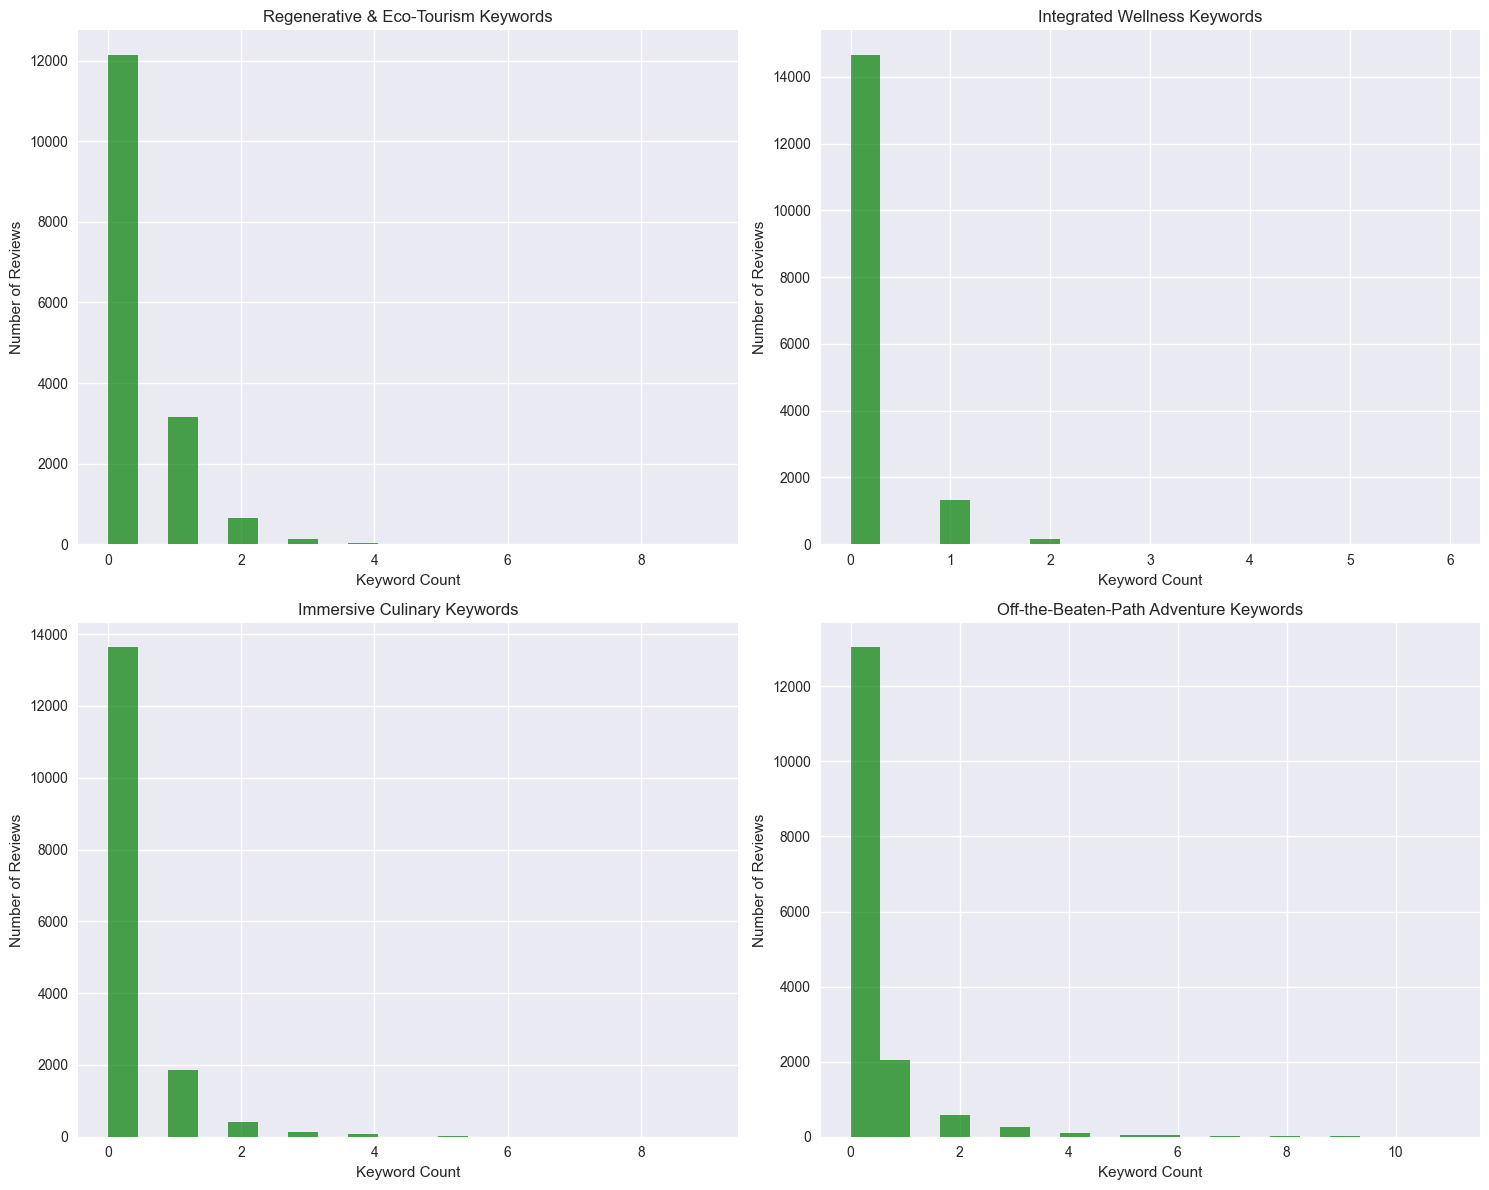

In [18]:
# Visualize keyword distribution
keyword_cols = [col for col in df.columns if 'keyword_count' in col]

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for i, col in enumerate(keyword_cols):
    row, col_idx = i // 2, i % 2
    
    # Histogram of keyword counts
    axes[row, col_idx].hist(df[col], bins=20, alpha=0.7, color='green')
    axes[row, col_idx].set_title(f'{col.replace("_keyword_count", "")} Keywords')
    axes[row, col_idx].set_xlabel('Keyword Count')
    axes[row, col_idx].set_ylabel('Number of Reviews')

plt.tight_layout()
plt.show()

Word Cloud Function

In [19]:
# Create word clouds for different rating levels
def create_wordcloud(text_data, title):
    # Combine all text
    text = ' '.join(text_data.dropna())
    
    # Create word cloud
    wordcloud = WordCloud(width=800, height=400, 
                         background_color='white',
                         max_words=100,
                         colormap='viridis').generate(text)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

Word Cloud Analysis

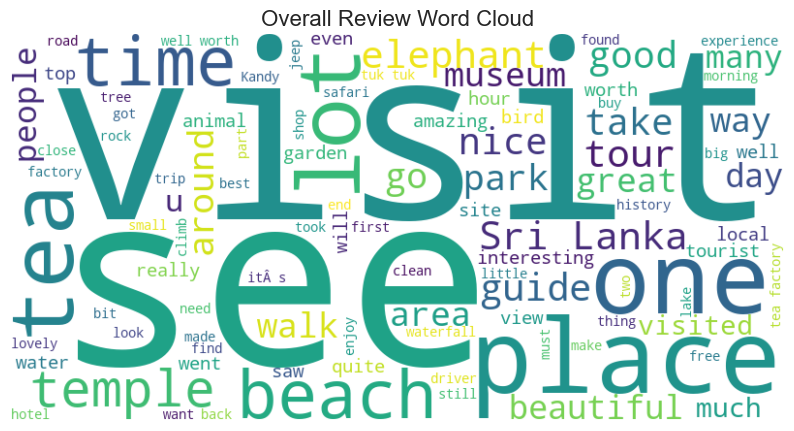

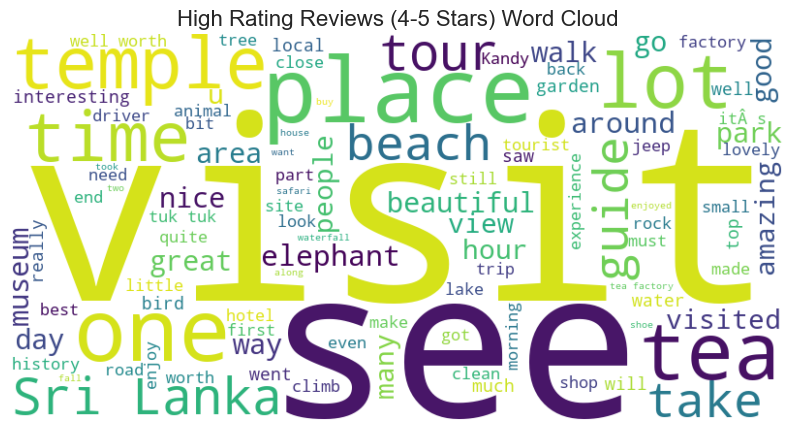

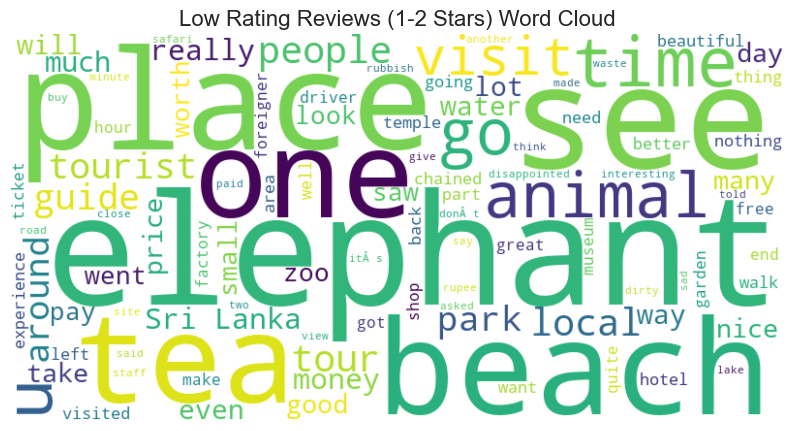

In [20]:
# Overall word cloud
create_wordcloud(df['Text'], 'Overall Review Word Cloud')

# High rating reviews (4-5 stars)
high_rating_text = df[df['Rating'].isin([4, 5])]['Text']
create_wordcloud(high_rating_text, 'High Rating Reviews (4-5 Stars) Word Cloud')

# Low rating reviews (1-2 stars)
low_rating_text = df[df['Rating'].isin([1, 2])]['Text']
create_wordcloud(low_rating_text, 'Low Rating Reviews (1-2 Stars) Word Cloud')

In [21]:
# Convert dates to datetime with error handling
try:
    # Try converting Published_Date
    df['Published_Date'] = pd.to_datetime(df['Published_Date'], errors='coerce')
    print("\nPublished_Date conversion successful")
except Exception as e:
    print(f"\nError converting Published_Date: {e}")
    
try:
    # Try converting Travel_Date
    df['Travel_Date'] = pd.to_datetime(df['Travel_Date'], format='%Y-%m', errors='coerce')
    print("Travel_Date conversion successful")
except Exception as e:
    print(f"Error converting Travel_Date: {e}")

# Check for any null values after conversion
print("\nNull values after conversion:")
print("-" * 50)
print("Published_Date nulls:", df['Published_Date'].isnull().sum())
print("Travel_Date nulls:", df['Travel_Date'].isnull().sum())

# Only proceed with date component extraction if conversion was successful
if df['Published_Date'].dtype == 'datetime64[ns]':
    df['Published_Year'] = df['Published_Date'].dt.year
    df['Published_Month'] = df['Published_Date'].dt.month
    df['Published_Month_Name'] = df['Published_Date'].dt.strftime('%B')

if df['Travel_Date'].dtype == 'datetime64[ns]':
    df['Travel_Year'] = df['Travel_Date'].dt.year
    df['Travel_Month'] = df['Travel_Date'].dt.month
    df['Travel_Month_Name'] = df['Travel_Date'].dt.strftime('%B')
    
    # Add season information (Sri Lanka has two monsoon seasons)
    def get_season(month):
        if month in [12, 1, 2]:
            return 'Northeast Monsoon'
        elif month in [3, 4]:
            return 'Inter-monsoon 1'
        elif month in [5, 6, 7, 8, 9]:
            return 'Southwest Monsoon'
        else:  # 10, 11
            return 'Inter-monsoon 2'

    df['Travel_Season'] = df['Travel_Month'].apply(get_season)

print("\nDate ranges in the dataset:")
print("-" * 50)
if df['Travel_Date'].dtype == 'datetime64[ns]':
    print(f"Travel dates: {df['Travel_Date'].min().strftime('%Y-%m')} to {df['Travel_Date'].max().strftime('%Y-%m')}")
if df['Published_Date'].dtype == 'datetime64[ns]':
    print(f"Review dates: {df['Published_Date'].min().strftime('%Y-%m-%d')} to {df['Published_Date'].max().strftime('%Y-%m-%d')}")


Published_Date conversion successful
Travel_Date conversion successful

Null values after conversion:
--------------------------------------------------
Published_Date nulls: 0
Travel_Date nulls: 0

Date ranges in the dataset:
--------------------------------------------------
Travel dates: 2010-09 to 2023-05


Temporal Patterns Analysis

In [22]:
# Prepare the temporal data
monthly_visits = df['Travel_Month_Name'].value_counts().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
seasonal_visits = df['Travel_Season'].value_counts()
monthly_ratings = df.groupby('Travel_Month_Name')['Rating'].mean().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
seasonal_ratings = df.groupby('Travel_Season')['Rating'].mean()

### Monthly Visit Distribution

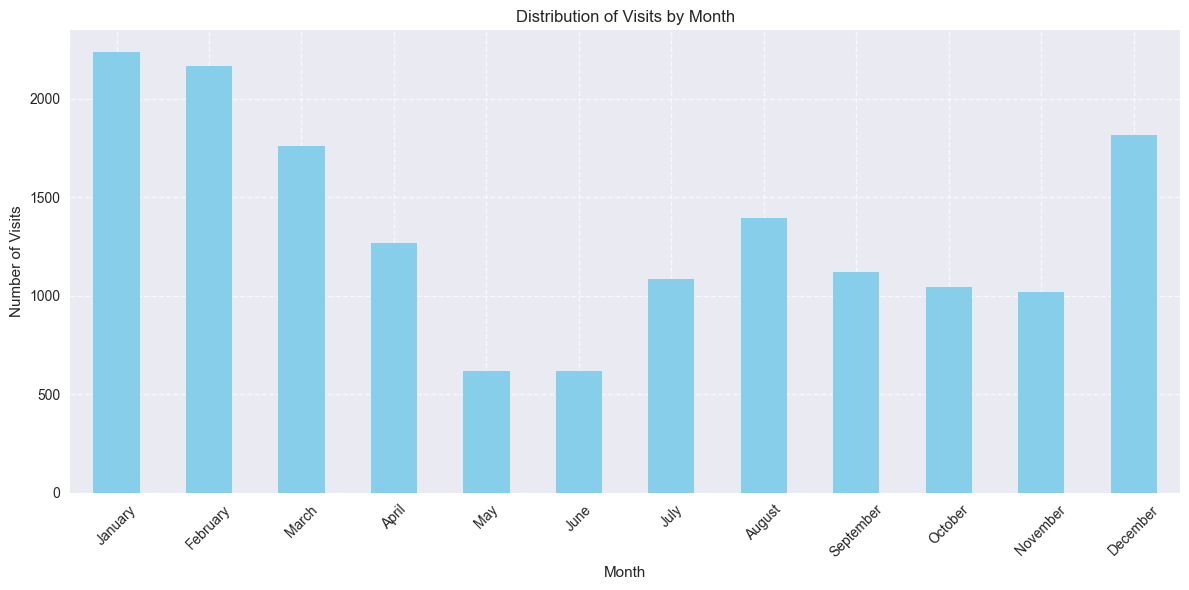

Busiest Months:
--------------------------------------------------
January: 2,236 visits (13.8%)
February: 2,168 visits (13.4%)
December: 1,819 visits (11.3%)


In [23]:
# Create monthly visit distribution plot
plt.figure(figsize=(12, 6))
monthly_visits.plot(kind='bar', color='skyblue')
plt.title('Distribution of Visits by Month')
plt.xlabel('Month')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print monthly visit statistics
print("Busiest Months:")
print("-" * 50)
for month, count in monthly_visits.nlargest(3).items():
    percentage = (count / len(df)) * 100
    print(f"{month}: {count:,} visits ({percentage:.1f}%)")

### Seasonal Distribution

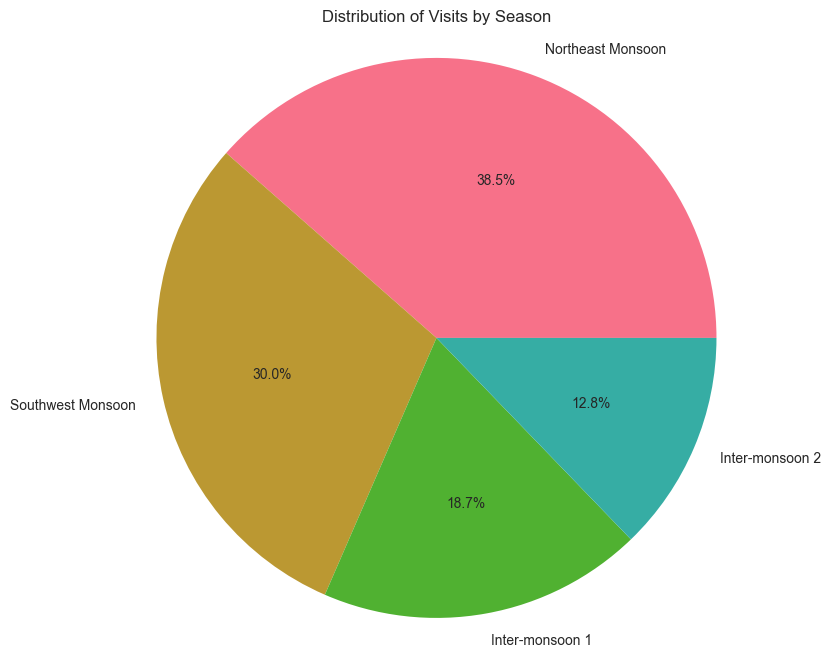

Seasonal Distribution:
--------------------------------------------------
Northeast Monsoon: 6,223 visits (38.5%)
Southwest Monsoon: 4,840 visits (30.0%)
Inter-monsoon 1: 3,028 visits (18.7%)
Inter-monsoon 2: 2,065 visits (12.8%)


In [24]:
# Create seasonal distribution plot
plt.figure(figsize=(10, 8))
plt.pie(seasonal_visits.values, labels=seasonal_visits.index, autopct='%1.1f%%')
plt.title('Distribution of Visits by Season')
plt.axis('equal')
plt.show()

# Print seasonal distribution statistics
print("Seasonal Distribution:")
print("-" * 50)
for season, count in seasonal_visits.items():
    percentage = (count / len(df)) * 100
    print(f"{season}: {count:,} visits ({percentage:.1f}%)")

### Monthly Rating Analysis

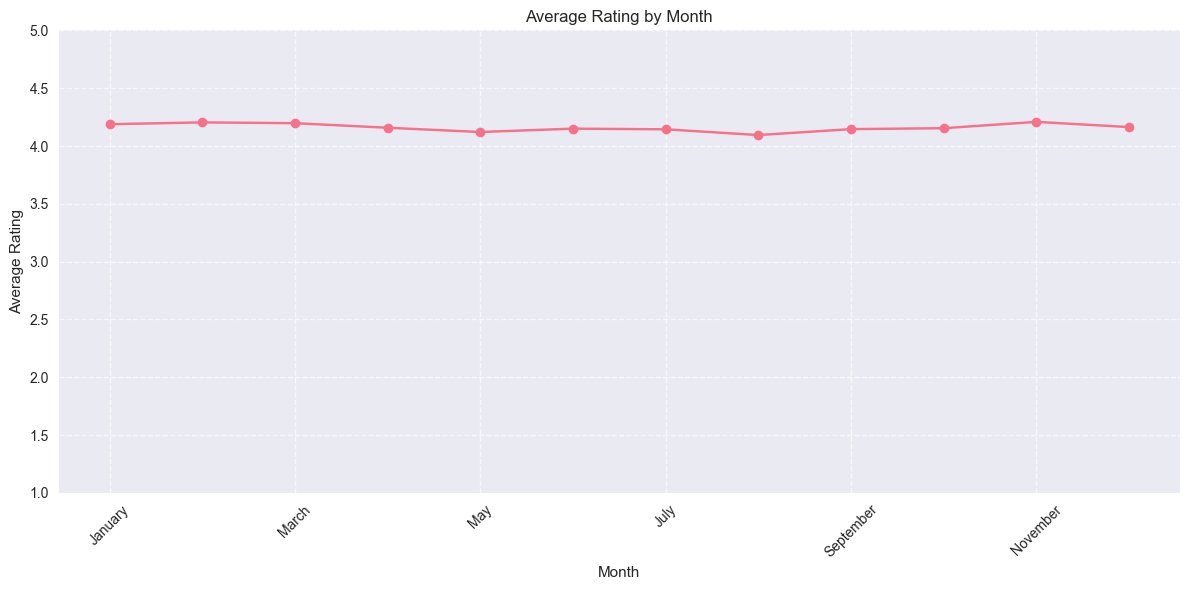

In [25]:
# Create monthly ratings plot
plt.figure(figsize=(12, 6))
monthly_ratings.plot(kind='line', marker='o')
plt.title('Average Rating by Month')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.ylim(1, 5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Seasonal Rating Analysis

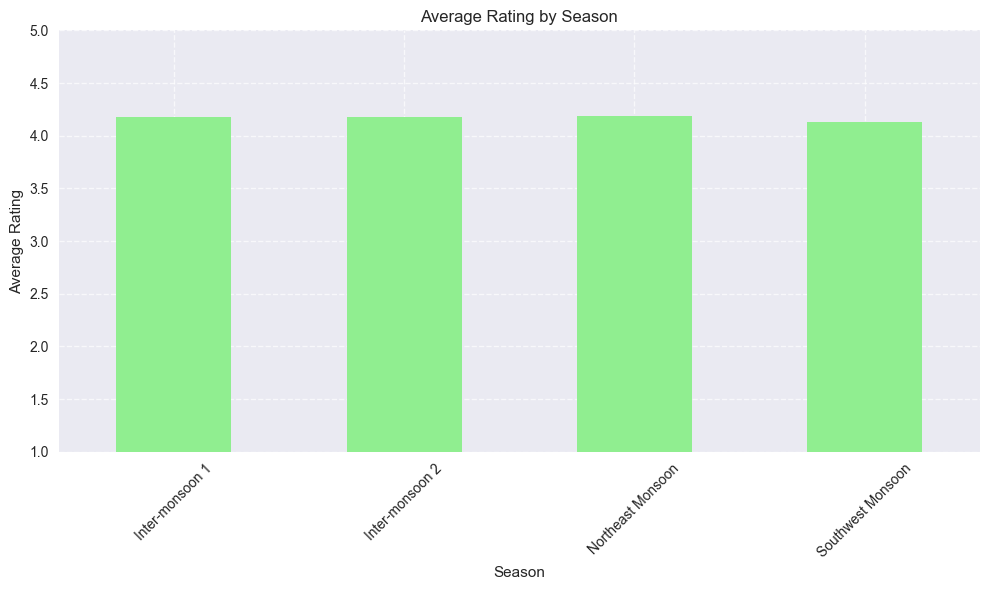

Average Ratings by Season:
--------------------------------------------------
Inter-monsoon 1: 4.18 stars
Inter-monsoon 2: 4.18 stars
Northeast Monsoon: 4.19 stars
Southwest Monsoon: 4.13 stars


In [26]:
# Create seasonal ratings plot
plt.figure(figsize=(10, 6))
seasonal_ratings.plot(kind='bar', color='lightgreen')
plt.title('Average Rating by Season')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.ylim(1, 5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print seasonal ratings statistics
print("Average Ratings by Season:")
print("-" * 50)
for season, rating in seasonal_ratings.items():
    print(f"{season}: {rating:.2f} stars")

Experiential Analysis by Season

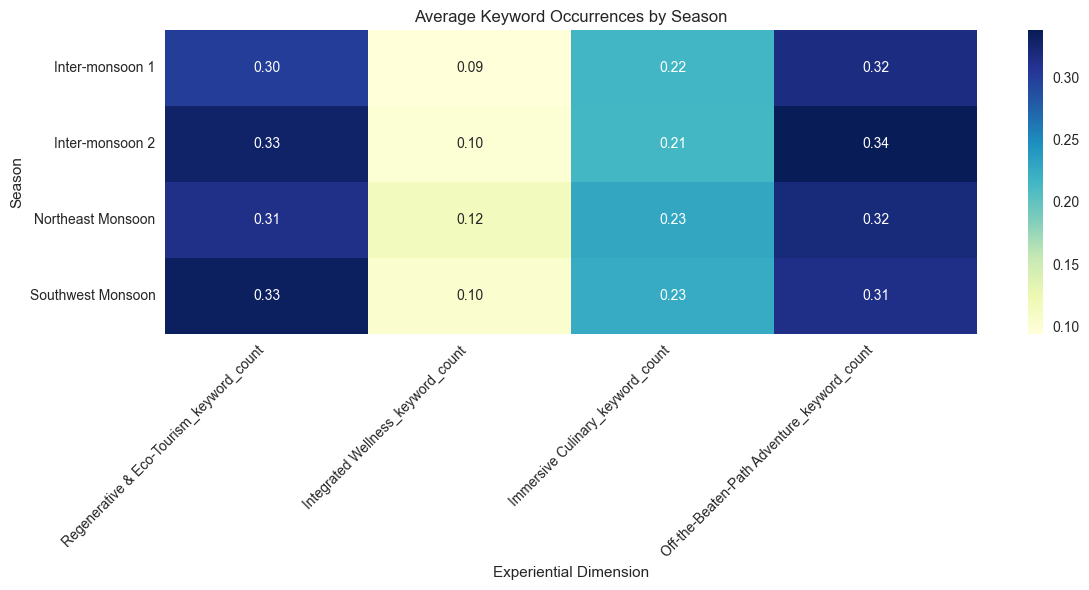

Dominant Experiences by Season:
--------------------------------------------------

Inter-monsoon 1:
Off-the-Beaten-Path Adventure: 0.32 keywords per review
Regenerative & Eco-Tourism: 0.30 keywords per review
Immersive Culinary: 0.22 keywords per review
Integrated Wellness: 0.09 keywords per review

Inter-monsoon 2:
Off-the-Beaten-Path Adventure: 0.34 keywords per review
Regenerative & Eco-Tourism: 0.33 keywords per review
Immersive Culinary: 0.21 keywords per review
Integrated Wellness: 0.10 keywords per review

Northeast Monsoon:
Off-the-Beaten-Path Adventure: 0.32 keywords per review
Regenerative & Eco-Tourism: 0.31 keywords per review
Immersive Culinary: 0.23 keywords per review
Integrated Wellness: 0.12 keywords per review

Southwest Monsoon:
Regenerative & Eco-Tourism: 0.33 keywords per review
Off-the-Beaten-Path Adventure: 0.31 keywords per review
Immersive Culinary: 0.23 keywords per review
Integrated Wellness: 0.10 keywords per review


In [27]:
# Analyze experiential dimensions by season
keyword_cols = [col for col in df.columns if 'keyword_count' in col]
seasonal_experiences = df.groupby('Travel_Season')[keyword_cols].mean()

# Create a heatmap of experiential dimensions by season
plt.figure(figsize=(12, 6))
sns.heatmap(seasonal_experiences, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Average Keyword Occurrences by Season')
plt.ylabel('Season')
plt.xlabel('Experiential Dimension')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print summary of dominant experiences by season
print("Dominant Experiences by Season:")
print("-" * 50)
for season in seasonal_experiences.index:
    print(f"\n{season}:")
    experiences = seasonal_experiences.loc[season].sort_values(ascending=False)
    for exp, score in experiences.items():
        exp_name = exp.replace('_keyword_count', '')
        print(f"{exp_name}: {score:.2f} keywords per review")

## Cross-Correlation Analysis

### Ratings vs Review Length Analysis

In [28]:
# Calculate correlation between review length and rating
correlation = df['text_length'].corr(df['Rating'])
print("Correlation Analysis: Review Length vs Rating")
print("-" * 50)
print(f"Correlation coefficient: {correlation:.3f}")

# Calculate average review length by rating
avg_length_by_rating = df.groupby('Rating')['text_length'].mean()
print("\nAverage Review Length by Rating:")
for rating, avg_length in avg_length_by_rating.items():
    print(f"{rating} stars: {avg_length:.0f} characters")

Correlation Analysis: Review Length vs Rating
--------------------------------------------------
Correlation coefficient: -0.057

Average Review Length by Rating:
1 stars: 503 characters
2 stars: 456 characters
3 stars: 376 characters
4 stars: 368 characters
5 stars: 376 characters


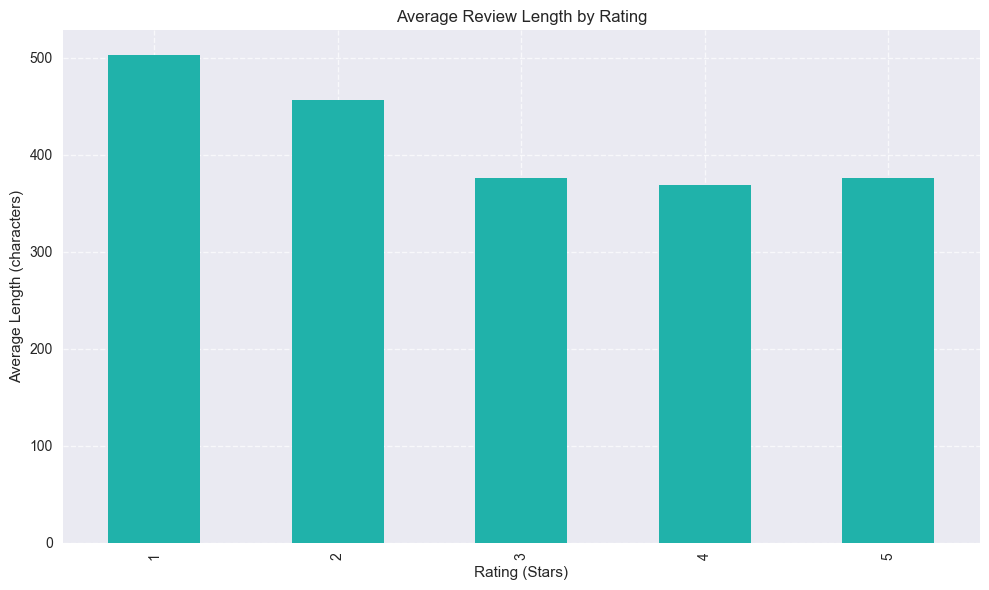

In [29]:
# Visualize average review length trend by rating
plt.figure(figsize=(10, 6))
avg_length_by_rating.plot(kind='bar', color='lightseagreen')
plt.title('Average Review Length by Rating')
plt.xlabel('Rating (Stars)')
plt.ylabel('Average Length (characters)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Location Type vs Ratings Analysis

In [30]:
# Calculate average ratings by location type
location_ratings = df.groupby('Location_Type')['Rating'].agg(['mean', 'count', 'std']).round(2)
location_ratings = location_ratings.sort_values('mean', ascending=False)

print("Average Ratings by Location Type:")
print("-" * 50)
for loc_type in location_ratings.index:
    stats = location_ratings.loc[loc_type]
    print(f"{loc_type}:")
    print(f"  Average Rating: {stats['mean']:.2f} stars")
    print(f"  Number of Reviews: {stats['count']:,}")
    print(f"  Standard Deviation: {stats['std']:.2f}")
    print()

Average Ratings by Location Type:
--------------------------------------------------
Historic Sites:
  Average Rating: 4.39 stars
  Number of Reviews: 1,519.0
  Standard Deviation: 0.84

National Parks:
  Average Rating: 4.39 stars
  Number of Reviews: 1,205.0
  Standard Deviation: 0.99

Religious Sites:
  Average Rating: 4.35 stars
  Number of Reviews: 3,017.0
  Standard Deviation: 0.82

Waterfalls:
  Average Rating: 4.19 stars
  Number of Reviews: 933.0
  Standard Deviation: 0.84

Museums:
  Average Rating: 4.14 stars
  Number of Reviews: 1,525.0
  Standard Deviation: 0.94

Nature & Wildlife Areas:
  Average Rating: 4.09 stars
  Number of Reviews: 1,557.0
  Standard Deviation: 1.18

Farms:
  Average Rating: 4.08 stars
  Number of Reviews: 1,884.0
  Standard Deviation: 1.03

Gardens:
  Average Rating: 4.07 stars
  Number of Reviews: 1,354.0
  Standard Deviation: 1.05

Beaches:
  Average Rating: 4.02 stars
  Number of Reviews: 2,110.0
  Standard Deviation: 1.14

Bodies of Water:
  Aver

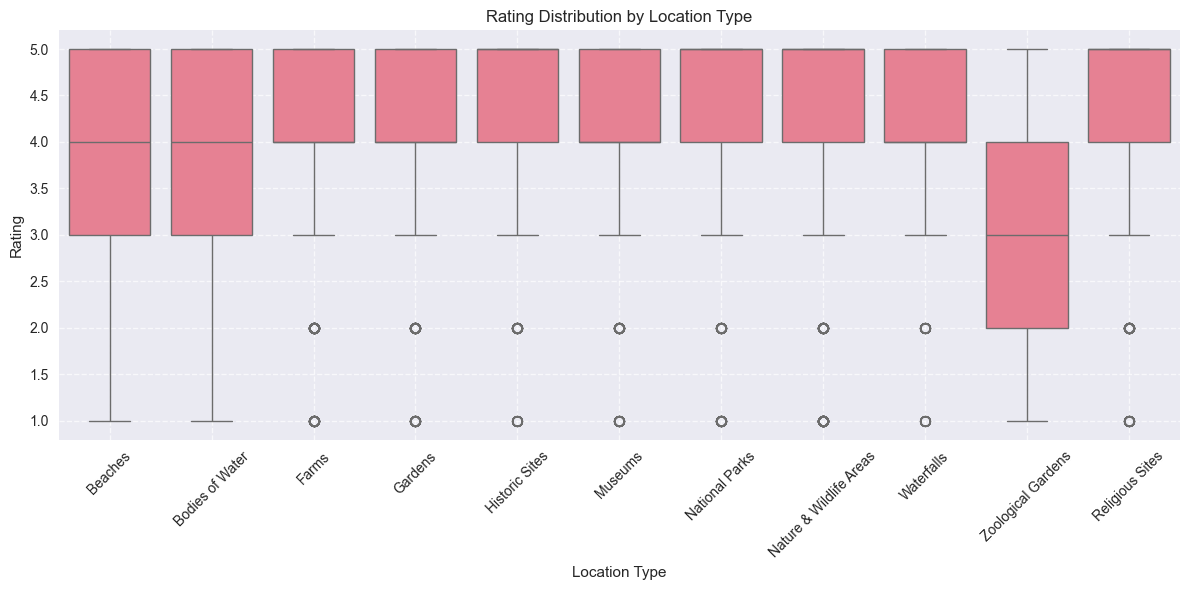

In [31]:
# Create boxplot of ratings by location type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Location_Type', y='Rating', data=df)
plt.title('Rating Distribution by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

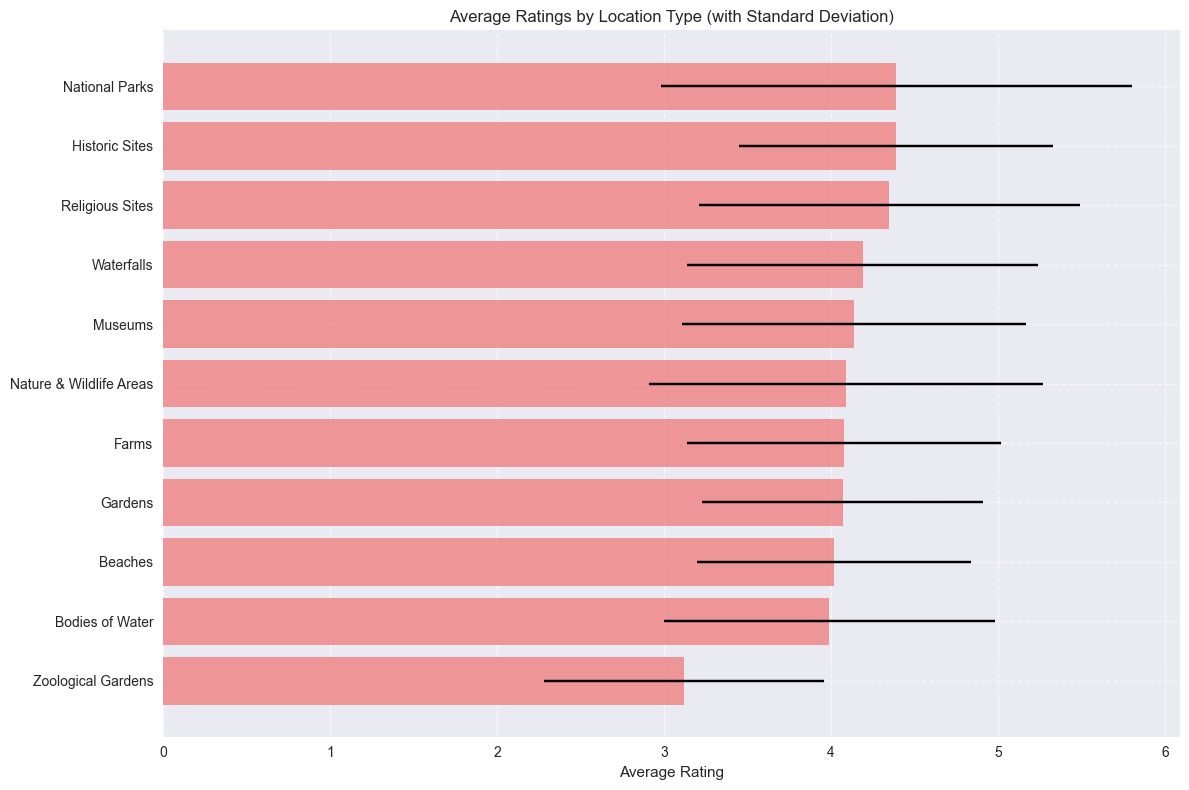

In [32]:
# Create horizontal bar plot of average ratings by location type
plt.figure(figsize=(12, 8))
loc_means = location_ratings['mean'].sort_values()
loc_stds = location_ratings['std']

# Plot bars and error bars
y_pos = np.arange(len(loc_means))
plt.barh(y_pos, loc_means, xerr=loc_stds, alpha=0.8, color='lightcoral')
plt.yticks(y_pos, loc_means.index)
plt.xlabel('Average Rating')
plt.title('Average Ratings by Location Type (with Standard Deviation)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [33]:
# Calculate average ratings by user experience level
experience_ratings = df.groupby('user_experience')['Rating'].agg(['mean', 'count', 'std']).round(2)

print("Average Ratings by User Experience Level:")
print("-" * 50)
for exp_level in ['New', 'Occasional', 'Regular', 'Experienced', 'Expert']:
    stats = experience_ratings.loc[exp_level]
    print(f"{exp_level}:")
    print(f"  Average Rating: {stats['mean']:.2f} stars")
    print(f"  Number of Reviews: {stats['count']:,}")
    print(f"  Standard Deviation: {stats['std']:.2f}")
    print()

Average Ratings by User Experience Level:
--------------------------------------------------
New:
  Average Rating: 4.28 stars
  Number of Reviews: 151.0
  Standard Deviation: 1.29

Occasional:
  Average Rating: 4.23 stars
  Number of Reviews: 2,430.0
  Standard Deviation: 1.15

Regular:
  Average Rating: 4.17 stars
  Number of Reviews: 5,145.0
  Standard Deviation: 1.06

Experienced:
  Average Rating: 4.19 stars
  Number of Reviews: 2,771.0
  Standard Deviation: 0.96

Expert:
  Average Rating: 4.13 stars
  Number of Reviews: 5,659.0
  Standard Deviation: 0.89



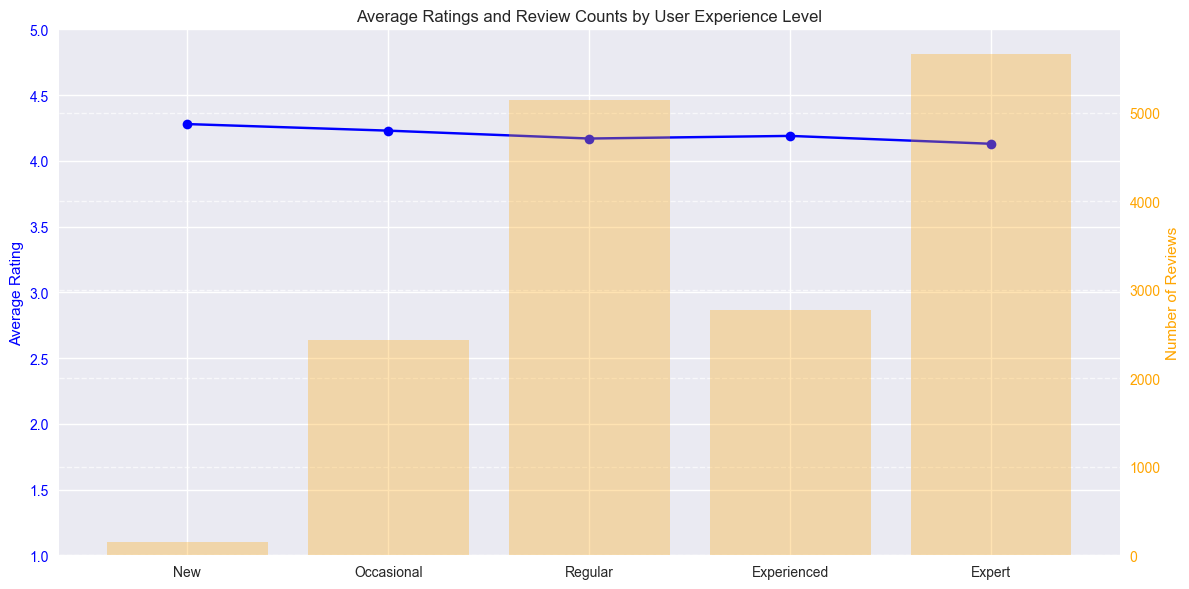

In [34]:
# Create dual-axis plot for ratings and review counts by experience level
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average ratings
exp_levels = ['New', 'Occasional', 'Regular', 'Experienced', 'Expert']
means = [experience_ratings.loc[level, 'mean'] for level in exp_levels]
ax1.plot(exp_levels, means, 'o-', color='blue', label='Average Rating')
ax1.set_ylabel('Average Rating', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(1, 5)

# Plot review counts on secondary axis
ax2 = ax1.twinx()
counts = [experience_ratings.loc[level, 'count'] for level in exp_levels]
ax2.bar(exp_levels, counts, alpha=0.3, color='orange', label='Number of Reviews')
ax2.set_ylabel('Number of Reviews', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title and adjust layout
plt.title('Average Ratings and Review Counts by User Experience Level')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Statistical Tests

### Chi-Square Tests for Categorical Variables

Chi-Square Test Results:
--------------------------------------------------

Location Type vs Rating:
Chi-square statistic: 976.13
p-value: 0.0000
Degrees of freedom: 40

Interpretation:
There is a significant relationship between Location Type and Rating

User Experience Level vs Rating:
Chi-square statistic: 611.17
p-value: 0.0000
Degrees of freedom: 16

Interpretation:
There is a significant relationship between User Experience Level and Rating


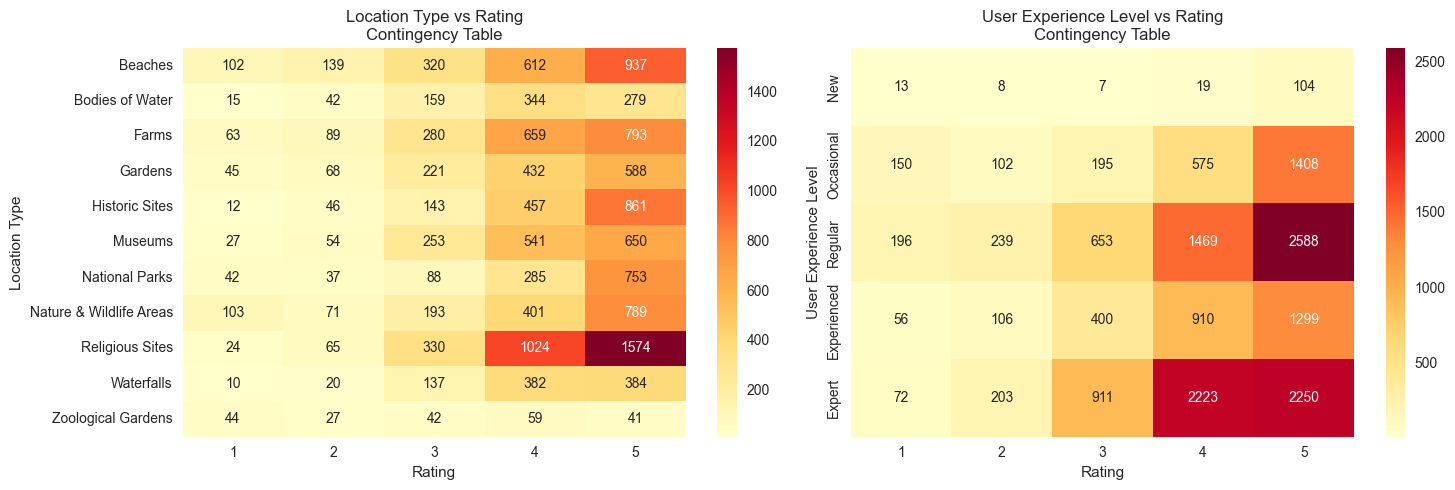

In [35]:
# Import required statistical testing modules
from scipy.stats import chi2_contingency, f_oneway

# Perform chi-square test for Location Type vs Rating
location_rating_contingency = pd.crosstab(df['Location_Type'], df['Rating'])
chi2_location_rating, p_value_location_rating, dof_location_rating, expected_location_rating = chi2_contingency(location_rating_contingency)

# Perform chi-square test for User Experience Level vs Rating
experience_rating_contingency = pd.crosstab(df['user_experience'], df['Rating'])
chi2_experience_rating, p_value_experience_rating, dof_experience_rating, expected_experience_rating = chi2_contingency(experience_rating_contingency)

print("Chi-Square Test Results:")
print("-" * 50)
print("\nLocation Type vs Rating:")
print(f"Chi-square statistic: {chi2_location_rating:.2f}")
print(f"p-value: {p_value_location_rating:.4f}")
print(f"Degrees of freedom: {dof_location_rating}")
print("\nInterpretation:")
if p_value_location_rating < 0.05:
    print("There is a significant relationship between Location Type and Rating")
else:
    print("No significant relationship between Location Type and Rating")

print("\nUser Experience Level vs Rating:")
print(f"Chi-square statistic: {chi2_experience_rating:.2f}")
print(f"p-value: {p_value_experience_rating:.4f}")
print(f"Degrees of freedom: {dof_experience_rating}")
print("\nInterpretation:")
if p_value_experience_rating < 0.05:
    print("There is a significant relationship between User Experience Level and Rating")
else:
    print("No significant relationship between User Experience Level and Rating")

# Visualize the contingency tables using heatmaps
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.heatmap(location_rating_contingency, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Location Type vs Rating\nContingency Table')
plt.xlabel('Rating')
plt.ylabel('Location Type')

plt.subplot(1, 2, 2)
sns.heatmap(experience_rating_contingency, annot=True, fmt='d', cmap='YlOrRd')
plt.title('User Experience Level vs Rating\nContingency Table')
plt.xlabel('Rating')
plt.ylabel('User Experience Level')

plt.tight_layout()
plt.show()

### ANOVA Tests for Comparing Means Across Groups

In [36]:
# Chi-square test between user experience level and location type
import scipy.stats as stats

# Create a contingency table
table = pd.crosstab(df['user_experience'], df['Location_Type'])

chi2, p, dof, expected = stats.chi2_contingency(table)

print('Chi-square statistic:', chi2)
print('p-value:', p)
print('Degrees of freedom:', dof)
print('Expected frequencies:\n', expected)

if p < 0.05:
    print('Result: Significant association (reject H0)')
else:
    print('Result: No significant association (fail to reject H0)')

Chi-square statistic: 710.4689820175887
p-value: 1.3246888786507785e-123
Degrees of freedom: 40
Expected frequencies:
 [[  19.72084674    7.84160683   17.60856648   12.65498886   14.19714038
    14.25321862   11.2623793    14.55230255   28.19800693    8.72016588
     1.99077742]
 [ 317.36197078  126.19274573  283.36964595  203.65313196  228.47053726
   229.37298836  181.24226294  234.18606091  453.78249567  140.33114632
    32.03701411]
 [ 671.94540728  267.18587522  599.97400347  431.1915078   483.73700173
   485.64774697  383.74133449  495.83838821  960.78639515  297.12088388
    67.83145581]
 [ 361.897128    143.90127507  323.1346868   232.23161674  260.53162912
   261.56072048  206.67584798  267.04920772  517.46143847  160.02370636
    36.53274325]
 [ 739.07464719  293.87849715  659.9130973   474.26875464  532.06369151
   534.16532558  422.07817529  545.3740406  1056.77166378  326.80409755
    74.60800941]]
Result: Significant association (reject H0)


In [37]:
# ANOVA: Compare mean ratings across user experience levels
from scipy.stats import f_oneway

# Prepare groups for ANOVA
groups = [group['Rating'].values for name, group in df.groupby('user_experience')]

anova_stat, anova_p = f_oneway(*groups)

print('ANOVA F-statistic:', anova_stat)
print('p-value:', anova_p)

if anova_p < 0.05:
    print('Result: Significant difference in means (reject H0)')
else:
    print('Result: No significant difference in means (fail to reject H0)')


ANOVA F-statistic: 5.399149388087094
p-value: 0.00024253773958412506
Result: Significant difference in means (reject H0)
